**Import Library**



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.utils import to_categorical

**Load dataset**

In [ ]:
# mendefinisikan dataset
df = pd.read_csv('/content/migraine.csv')
df

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,1,0,0,1,0,0,0,0,1,Basilar-type aura
396,20,3,2,1,1,3,1,0,1,1,...,0,1,1,0,0,0,0,0,1,Basilar-type aura
397,28,3,2,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,1,Basilar-type aura
398,20,3,1,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,1,1,Basilar-type aura


**Informasi dataset**

In [ ]:
# melihat anggota masing-masing class
df.groupby('Type').size()

Type
Basilar-type aura                 18
Familial hemiplegic migraine      24
Migraine without aura             60
Other                             17
Sporadic hemiplegic migraine      14
Typical aura with migraine       247
Typical aura without migraine     20
dtype: int64

In [ ]:
# melihat info statistikal data
df.describe()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,...,400.0000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000
mean,31.705000,1.610000,2.365000,0.972500,0.977500,2.47000,0.987500,0.322500,0.977500,0.980000,...,0.0025,0.125000,0.060000,0.015000,0.005000,0.015000,0.0,0.017500,0.007500,0.410000
std,12.139043,0.770964,1.675947,0.268186,0.277825,0.76849,0.111242,0.468019,0.148489,0.140175,...,0.0500,0.331133,0.237784,0.121705,0.070622,0.121705,0.0,0.131289,0.086385,0.492449
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,28.000000,1.000000,2.000000,1.000000,1.000000,3.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.000000,2.000000,4.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,77.000000,3.000000,8.000000,2.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [ ]:
# mengecek missing values
df.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

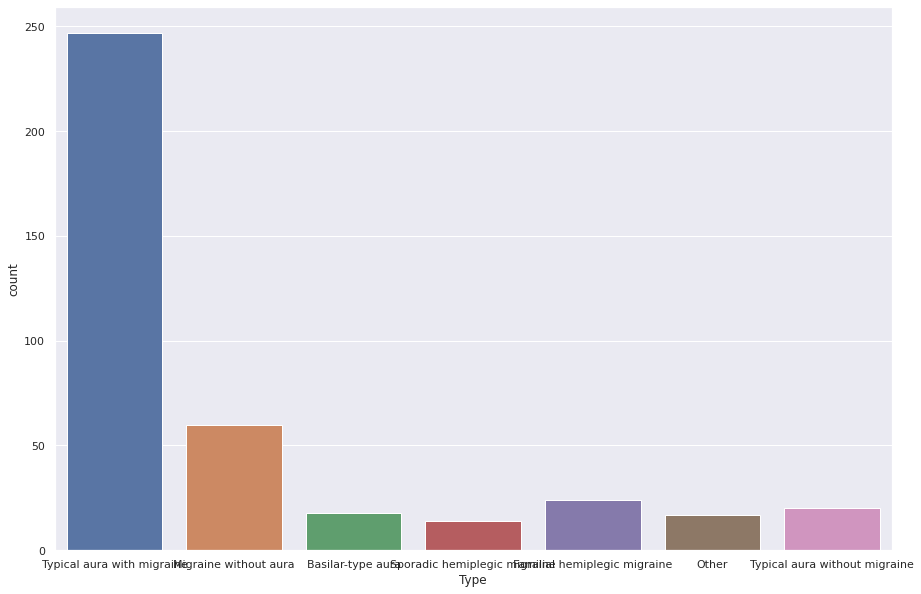

In [ ]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.countplot(x=df.Type)

Karena jumlah data masing-masing class imbalance, akan dilakukan resampling supaya jumlah data lebih merata.

In [ ]:
# karena pada target terdapat 7 class maka buat 7 data frame
data_1 = df[df['Type'] == 'Typical aura with migraine']
data_2 = df[df['Type'] == 'Migraine without aura']
data_3 = df[df['Type'] == 'Familial hemiplegic migraine']
data_4 = df[df['Type'] == 'Typical aura without migraine']
data_5 = df[df['Type'] == 'Basilar-type aura']
data_6 = df[df['Type'] == 'Other']
data_7 = df[df['Type'] == 'Sporadic hemiplegic migraine']

In [ ]:
# memakai fungsi sampling dari sklearn
from sklearn.utils import resample

# 100 sampel untuk tiap class
data_1_resample = resample(data_1, n_samples=100, random_state=0, replace=True)
data_2_resample = resample(data_2, n_samples=100, random_state=0, replace=True)
data_3_resample = resample(data_3, n_samples=100, random_state=0, replace=True)
data_4_resample = resample(data_4, n_samples=100, random_state=0, replace=True)
data_5_resample = resample(data_5, n_samples=100, random_state=0, replace=True)
data_6_resample = resample(data_6, n_samples=100, random_state=0, replace=True)
data_7_resample = resample(data_7, n_samples=100, random_state=0, replace=True)

In [ ]:
train_dataset = pd.concat([data_1, data_2_resample, data_3_resample, data_4_resample, data_5_resample, data_6_resample, data_7_resample])

Melihat distribusi data setelah dilakukan resampling.

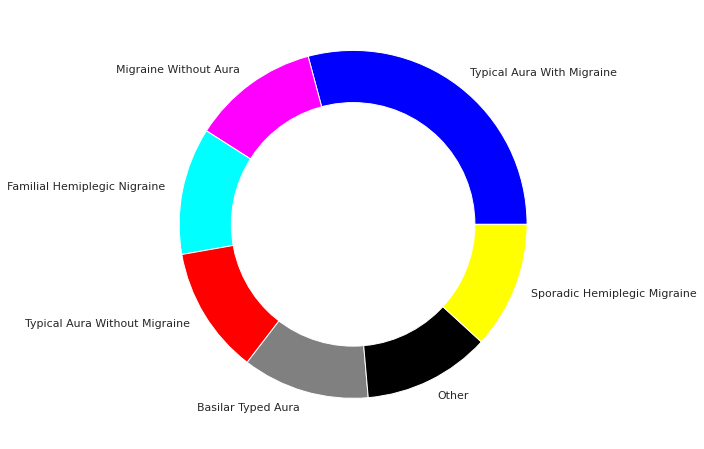

In [ ]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(train_dataset.Type.value_counts(), labels=['Typical Aura With Migraine', 'Migraine Without Aura', 'Familial Hemiplegic Nigraine',
                                                'Typical Aura Without Migraine', 'Basilar Typed Aura', 
                                         'Other', 'Sporadic Hemiplegic Migraine'], colors=['blue', 'magenta', 'cyan', 
                                                                                   'red', 'grey', 'black', 'yellow'])
p = plt.gcf()
p.gca().add_artist(circle)

Distribusi data sudah lebih rata daripada sebelumnya.

**Splitting Data**

Feature Selection

In [ ]:
X = train_dataset.drop('Type', axis=1)
Y = train_dataset['Type']

Data untuk training sebanyak 70% dan untuk testing sebanyak 30%.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

**Encoding**

Y merupakan data bertipe *categorical* maka diperlukan encoding.

In [ ]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [ ]:
labelled_Y = to_categorical(encoded_Y)

Mencari algoritma yang memiliki accuracy paling tinggi

In [ ]:
# spot check algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
scoring = 'accuracy'

In [ ]:
from sklearn import model_selection
# evaluasi setiap model
results = []
names = []

for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=0, shuffle=True)
  cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

KNN: 0.772119 (0.039716)
NB: 0.880085 (0.028519)
SVM: 0.359915 (0.059152)


Berdasarkan penilaian spot check algorithm di atas, metode Naive Bayes memiliki nilai accuracy paling tinggi.

**Modelling**

In [ ]:
# fitting
NB = GaussianNB()
NB.fit(X_train, Y_train)

GaussianNB()

In [ ]:
Y_pred = NB.predict(X_test)
Y_pred

array(['Other', 'Typical aura with migraine', 'Basilar-type aura',
       'Other', 'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura without migraine', 'Familial hemiplegic migraine',
       'Migraine without aura', 'Basilar-type aura',
       'Migraine without aura', 'Familial hemiplegic migraine',
       'Migraine without aura', 'Basilar-type aura', 'Other',
       'Typical aura with migraine', 'Other',
       'Typical aura with migraine', 'Sporadic hemiplegic migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Sporadic hemiplegic migraine',
       'Other', 'Other', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Other',
       'Familial hemiplegic migraine', 'Migraine without aura',
       'Typical aura without migraine', 'Basilar-type aura', 'O

**Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:.4f}'. format(accuracy_score(Y_test, Y_pred)))
print('Training set score: {:.4f}'.format(NB.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(NB.score(X_test, Y_test)))

Model accuracy score: 0.8863
Training set score: 0.8801
Test set score: 0.8863


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[21  2  0  0  4  0  0]
 [ 0 14  0  0  0 15  0]
 [ 0  0 37  0  0  0  0]
 [ 0  0  0 30  0  0  0]
 [ 0  0  0  0 26  5  0]
 [ 0  2  0  1  0 66  0]
 [ 0  0  0  0  0  0 32]]


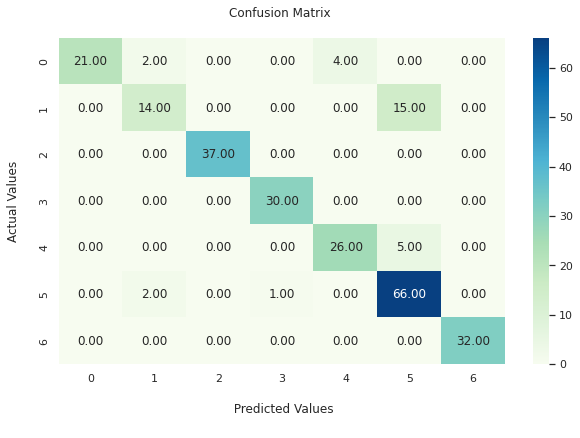

In [ ]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(Y_test,Y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
plt.show()

Karena klasifikasi yang dilakukan memiliki 7 class, maka kita akan mendapatkan confusion matrix 7x7

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.78      0.88        27
 Familial hemiplegic migraine       0.78      0.48      0.60        29
        Migraine without aura       1.00      1.00      1.00        37
                        Other       0.97      1.00      0.98        30
 Sporadic hemiplegic migraine       0.87      0.84      0.85        31
   Typical aura with migraine       0.77      0.96      0.85        69
Typical aura without migraine       1.00      1.00      1.00        32

                     accuracy                           0.89       255
                    macro avg       0.91      0.87      0.88       255
                 weighted avg       0.89      0.89      0.88       255



**Visualization**

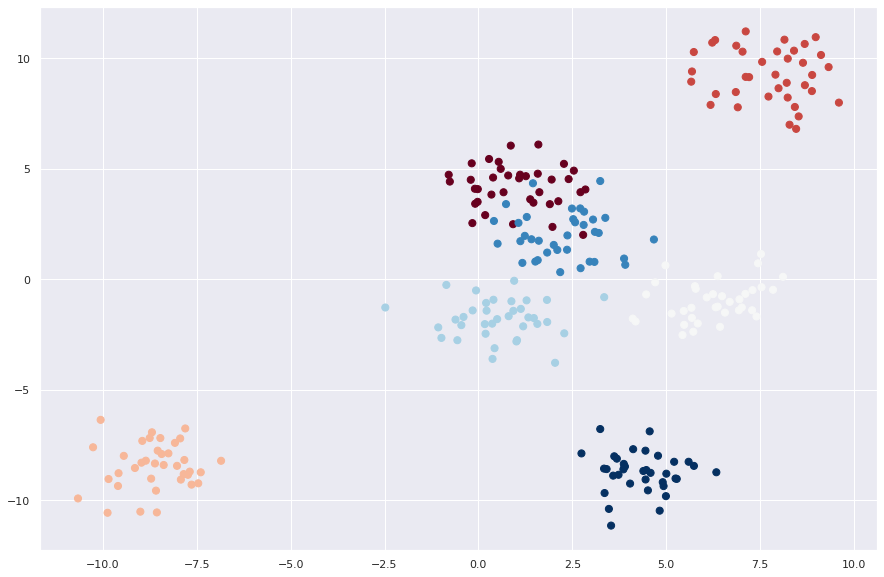

In [ ]:
from sklearn.datasets import make_blobs
X_test, Y_test = make_blobs(255, 7, centers=7, random_state=0, cluster_std=1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, s=50, cmap='RdBu');